# Linear Models

Linear models make a prediction using a *linear function* of the input features.

### Linear models for regression

The general formula for a linear model is as below:

ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

The simplest and most classic linear method is *ordinary least square*. In this method, linear regression finds the parameters *w* and *b* that minimize the *mean squared error* between predictions and the true regression targets,*y*, on the training set.

The *mean squared error* is the sum of the squared differences between the predictions and the true values. Linear regression has no parameters, which is a benefit, but it also has no way to control model complexity. 

In [39]:
import pandas as pd
import mglearn
import matplotlib 
import matplotlib.pylab as plt
%matplotlib inline

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=111)

In [7]:
lr = LinearRegression().fit(X_train, y_train)

The *slope* parametrs *(w)* which is also called *weights* or *coefficients* are stored in the *coef_* attribute, while the offset or *intercept (b)* is stored in the *intercept_* attribute.

In [11]:
print('lr.coef_: {}'.format(lr.coef_))
print('lr.intercept_: {}'.format(lr.intercept_))

lr.coef_: [ 0.44231285]
lr.intercept_: -0.04949297304070671


There will be alwasy one single *intercetp_* attribute while the *coef_* attribute is a Numpy array with one entry per input feature. 

Looking at training set and test set performance:

In [13]:
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))

Training set score: 0.70
Test set score: 0.56


An $R^2$ of around 0.56 is not very good, but we can see that the scores on the training
and test sets are very close together. This means we are likely underfitting, not over‐
fitting. **For this one-dimensional dataset, there is little danger of overfitting, as the
model is very simple (or restricted). However, with higher-dimensional datasets
(meaning datasets with a large number of features), linear models become more pow‐
erful, and there is a higher chance of overfitting**.

Now, we look at how *LinearRegression* performs on a more complex dataset, like the Boston Housing dataset. This dataset has 506 samples and 105 features.

In [20]:
X, y = mglearn.datasets.load_extended_boston()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=112)

In [27]:
lr = LinearRegression().fit(X_train, y_train)

In [31]:
print('Training score is: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test score is: {:.2f}'.format(lr.score(X_test, y_test)))

Training score is: 0.93
Test score is: 0.87


Another commonly used standard linear regression is ***Ridge regression*** which is explained as below:

#### Ridge regression

Reidge regression is also a linear model for regression. It uses the same formula as the ordinary least squre regression model. In the ridge regression, though, the coefficients *(w)* are chosen not only so that they predict well on the training data, but also to fit an additional constraint. We also want the magnitude of the coefficients to as small as possible, in other words, all entries of *w* should be as close to zero. This means each feature should have a little effect on the outcome as possible (having a small slope), while still predicting well. This constraint is an example of what is called regularization. Regularization means explicitly restricting a model to avoid overfitting. The particular kind used by ridge regression is known as L2 regularization.

In [34]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print('Training set score is: {:.2f}'.format(ridge.score(X_train, y_train)))
print('Test set score is: {:.2f}'.format(ridge.score(X_test, y_test)))

Training set score is: 0.84
Test set score is: 0.89


As you can see, the training set score of Ridge is lower than for LinearRegression, while the test set score is higher. This is consistent with our expectation. With linear regression, we were overfitting our data. Ridge is a more restricted model, so we are less likely to overfit. A less complex model means worse performance on the training set, but better generalization. As we are only interested in generalization performance, we should choose the Ridge model over the LinearRegression model.

Another important parameter in Ridge regression is called *alpha* which is by default set to 1. However, if one wants to force the coeffecients to move more toward zero, which decreases training set performance, you can set *alpha* to higher values. 
We can see more in the example below:

In [36]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('Training set score is: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('Test set score is: {:.2f}'.format(ridge10.score(X_test, y_test)))

Training set score is: 0.74
Test set score is: 0.79


In [37]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('Training set score is: {:.2f}'.format(ridge01.score(X_train, y_train)))
print('Test set score is: {:.2f}'.format(ridge01.score(X_test, y_test)))

Training set score is: 0.90
Test set score is: 0.91


A higher alpha means a more restricted model, so we expect the entries of coef_ tohave smaller magnitude for a high value of alpha than for a low value of alpha .

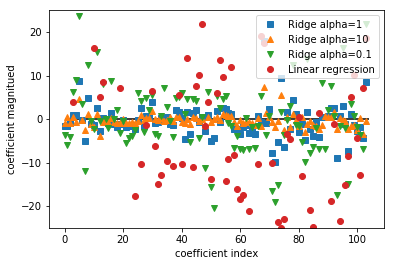

In [47]:
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='Linear regression')
plt.xlabel('coefficient index')
plt.ylabel('coefficient magnitued')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend(loc=1)

*Comparing coefficient magnitudes for ridge regression with different values of alpha and linear regression*